<IPython.core.display.Javascript object>


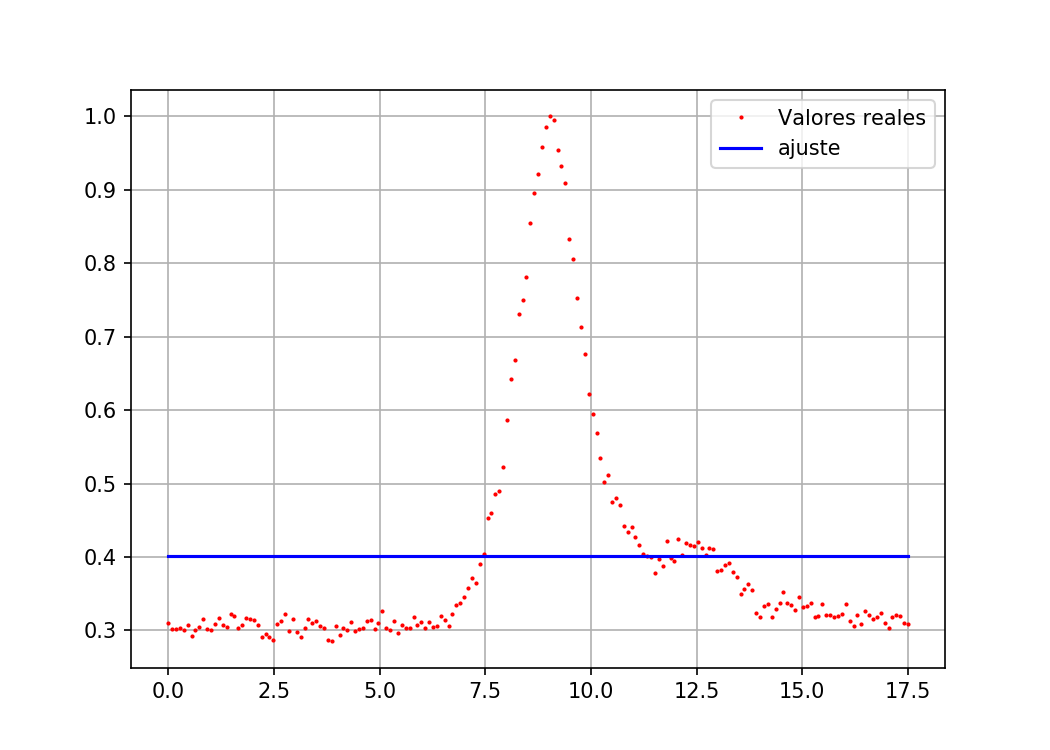

array([-2.8344682 ,  0.00891719,  0.40130422,  1.        ])

In [59]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

sin=np.sin
cos=np.cos

XPS=pd.read_excel("datos.xlsx")
x=np.linspace(0,17.5,191)#XPS["eV"]
y=XPS["Counts"]

y_norm=y / y.max(axis=0)

def obj(beta,x,y_norm):
    f=np.exp(-(x-beta[0])**2/beta[1]**2)+beta[2] #np.exp(-(x-beta[2])**2/beta[3]**2)
    return np.sum((y_norm-f)**2)

beta=[0,1,0,1]
p=opt.minimize(obj,beta,args=(x,y_norm))

def f(beta,x):
    return np.exp(-(x-beta[0])**2/beta[1]**2)+beta[2]#np.exp(-(x-beta[2])**2/beta[3]**2)

pt.figure(figsize=(7,5))
pt.plot(x,y_norm,'or',ms=1,label='Valores reales')
pt.plot(x,f(p.x,x),'b',label='ajuste')
pt.legend(loc='best')
pt.grid(True)
p.x

<IPython.core.display.Javascript object>


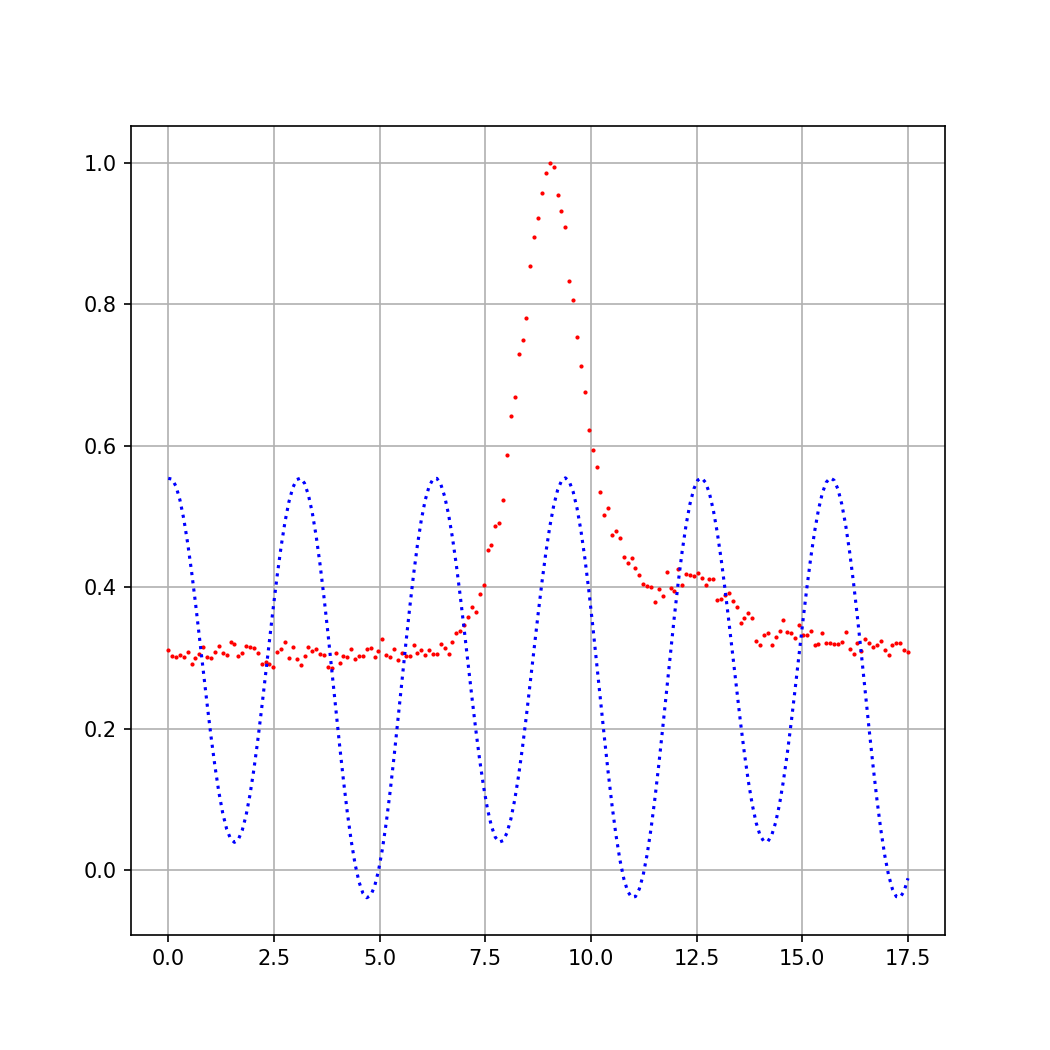

In [62]:
def obj(beta,x,y_norm,n):
    f=beta@[x**i for i in range (n+1)]
    if n==3:
        f=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    return np.sum((y_norm-f)**2)

beta5=[0,0,0,1,1,1]
p5=opt.minimize(obj,beta5,args=(x,y_norm,5))

def f(beta,x,n):
    return beta@[x**i for i in range (n+1)]

pt.figure(figsize=(7,7))
pt.plot(x,y_norm,'or',ms=1,label='Valores reales')
pt.plot(x,f(p5.x,x,6),'b:',label='Polinomio grado 1')
pt.grid(True)